In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for the new dataframe
new_data = {
    'Model': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'],
    'Type': ['Linear probing', 'Linear probing', 'Linear probing', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Rule-Based', 'Control'],
    'Method': ['Logistic Regression (CLOOME)', 'Logistic Regression (Cell Count)', 'Logistic Regression (CellProfiler)', 'ResNet', 'Cell Count', 'DenseNet', 'GapNet', 'MIL-Net', 'M-CNN', 'SC-CNN', 'FNN', 'Cell Count', 'y-scrambling'],
    'AUC': [0.713, 0.534, 0.655, 0.731, 0.51, 0.730, 0.725, 0.711, 0.705, 0.705, 0.675, 0.55, 0.50],
    'AUC Std Dev': [0.19, 0.15, 0.20, 0.19, 0.12, 0.19, 0.19, 0.18, 0.19, 0.20, 0.20, 0.08, 0.01],
    'AUC > 0.9': [57, 0, 35, 66, 0, 65, 60, 59, 58, 63, 54, 0, 0],
    'AUC > 0.8': [83, 5, 63, 85, 0, 93, 88, 71, 72, 71, 69, 0, 0],
    'AUC > 0.7': [102, 20, 84, 114, 14, 113, 115, 100, 100, 104, 78, 6, 0],
    'AUC > 0.5': [179, 135, 'Not provided', 178, 112, 178, 179, 187, 172, 172, 170, 152, 101]
}

# Create DataFrame
df = pd.DataFrame(new_data)


In [28]:
df

,Model,Type,Method,AUC,AUC Std Dev,AUC > 0.9,AUC > 0.8,AUC > 0.7,AUC > 0.5
0,a,Linear probing,Logistic Regression (CLOOME),0.713,0.19,57,83,102,179
1,b,Linear probing,Logistic Regression (Cell Count),0.534,0.15,0,5,20,135
2,c,Linear probing,Logistic Regression (CellProfiler),0.655,0.20,35,63,84,Not provided
3,d,Supervised,ResNet,0.731,0.19,66,85,114,178
4,e,Supervised,Cell Count,0.510,0.12,0,0,14,112
5,f,Supervised,DenseNet,0.730,0.19,65,93,113,178
6,g,Supervised,GapNet,0.725,0.19,60,88,115,179
7,h,Supervised,MIL-Net,0.711,0.18,59,71,100,187
8,i,Supervised,M-CNN,0.705,0.19,58,72,100,172
9,j,Supervised,SC-CNN,0.705,0.20,63,71,104,172


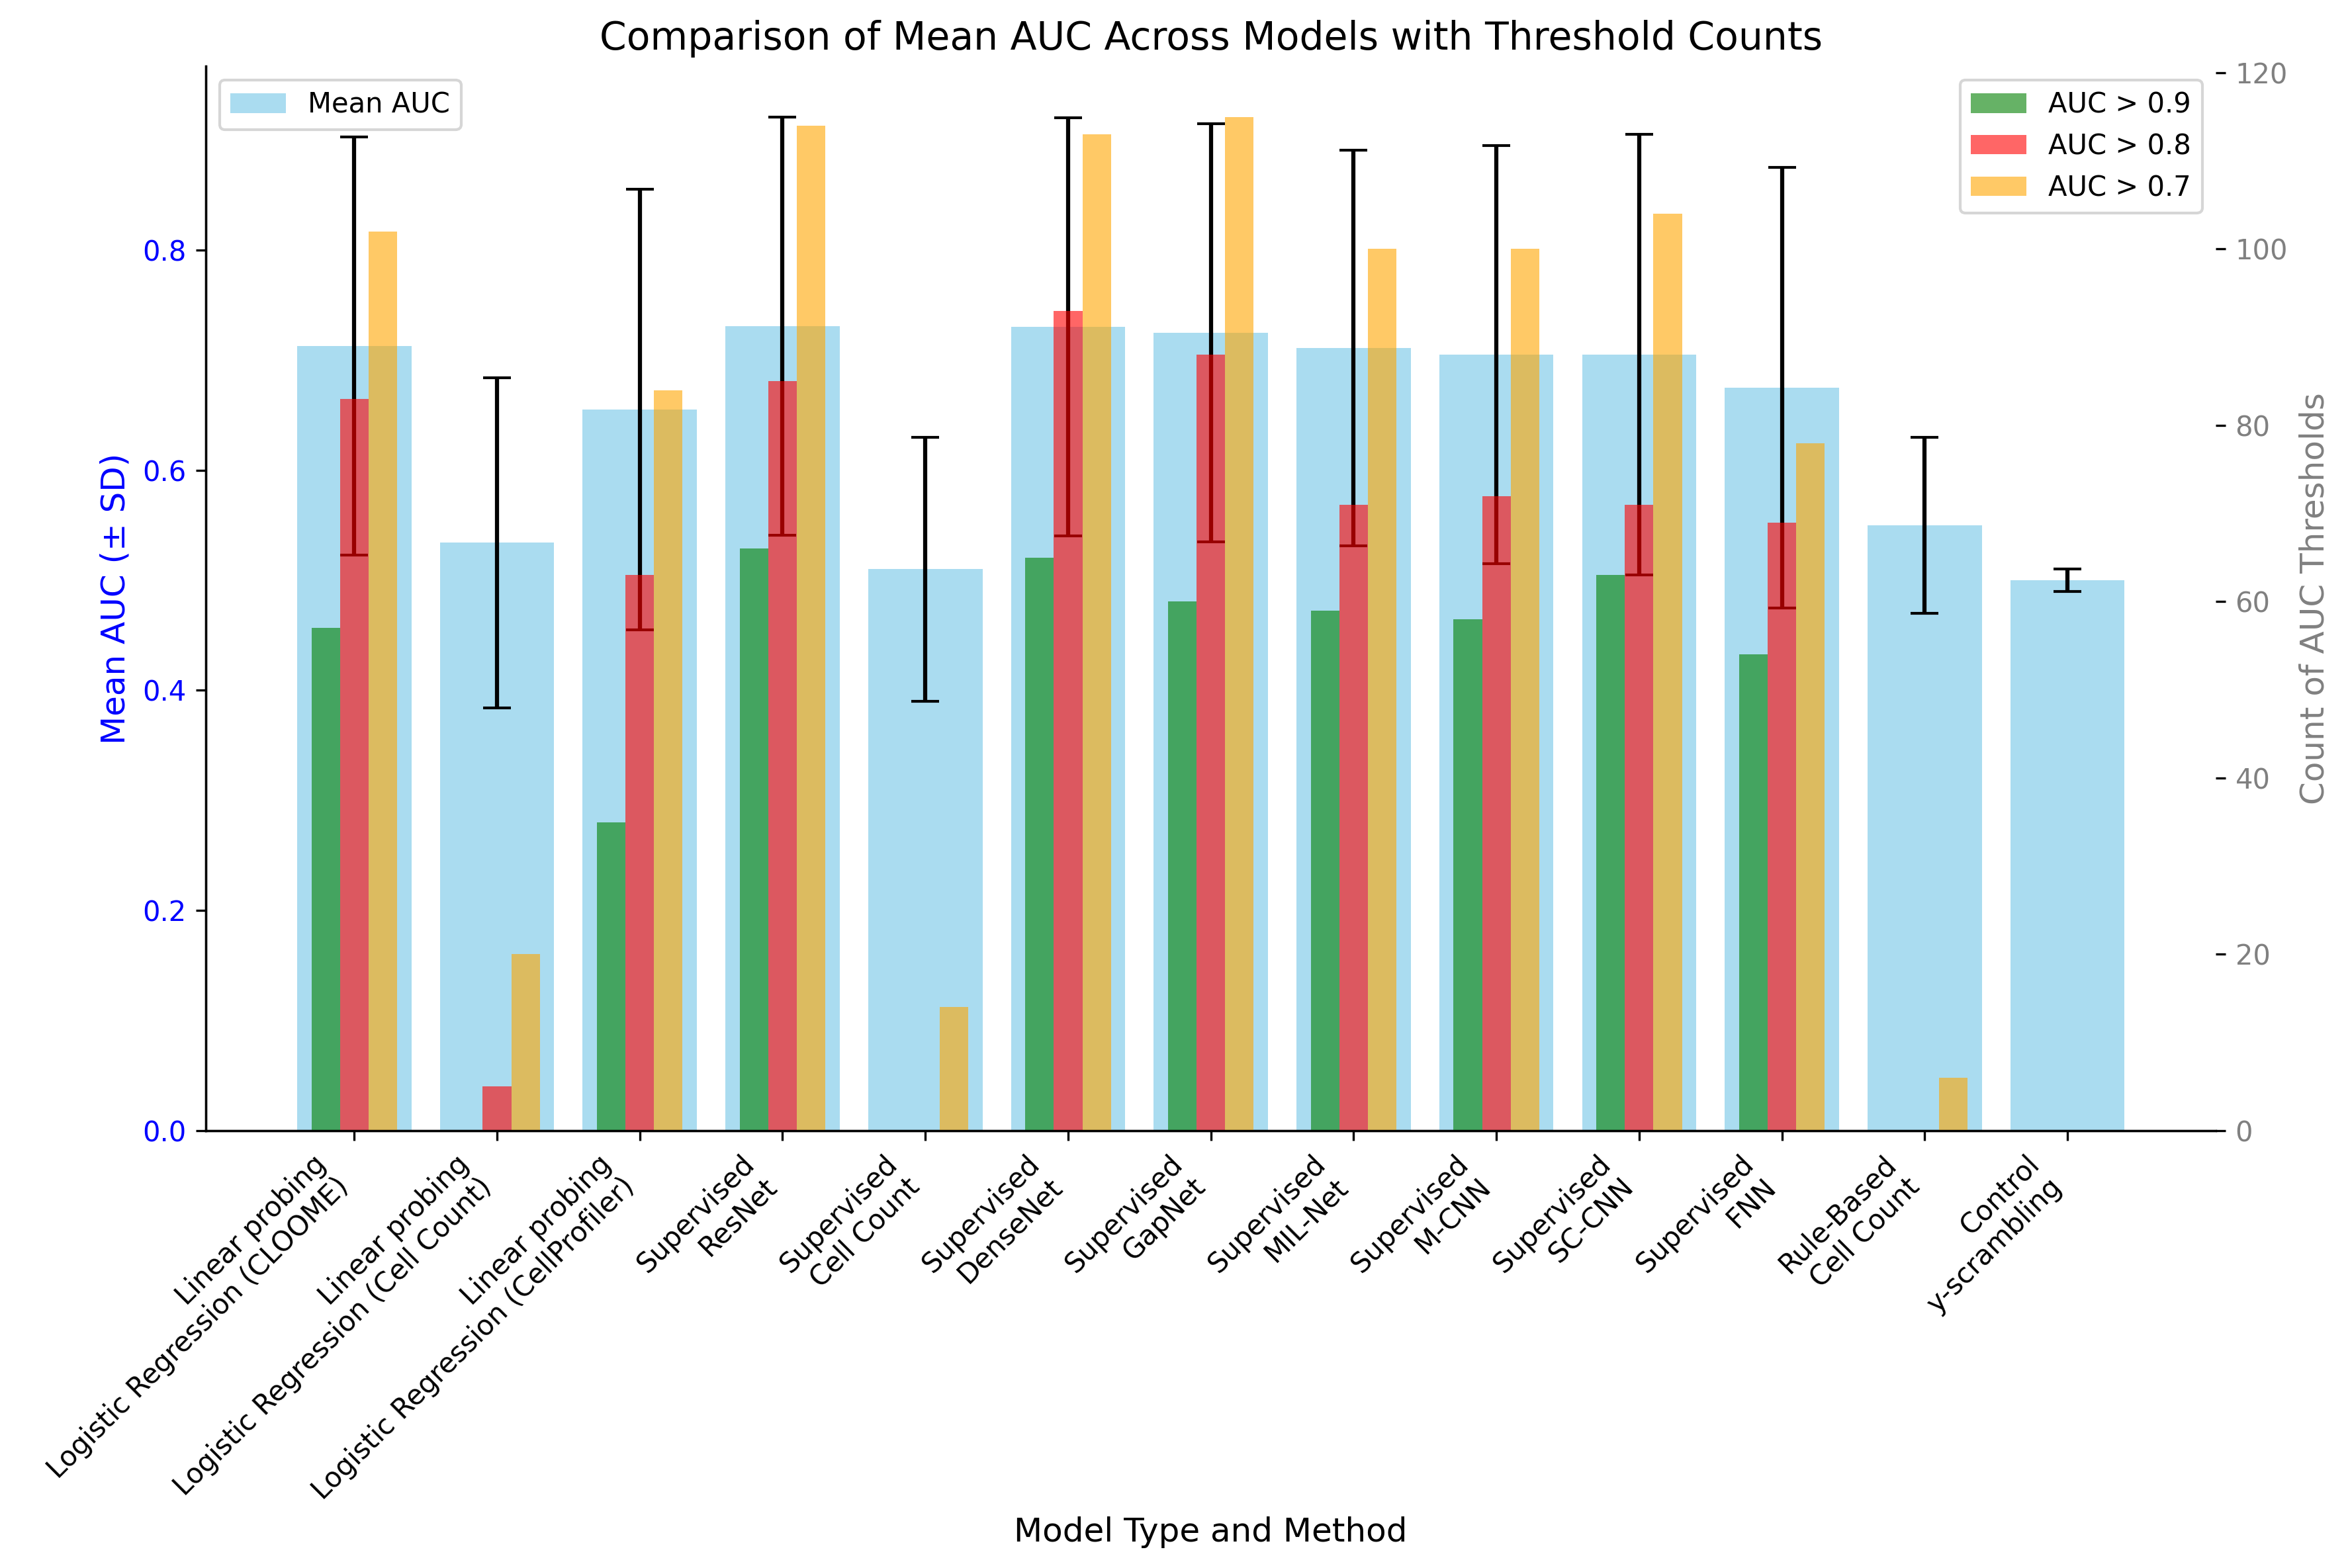

In [32]:
# Create numerical model indices
new_model_indices = np.arange(len(df['Model']))

# Combine 'Type' and 'Method' for x-axis labels
new_x_labels = [f"{t}\n{m}" for t, m in zip(df['Type'], df['Method'])]

# Convert AUC > 0.5 to numeric, handling 'Not provided'
df['AUC > 0.5'] = pd.to_numeric(df['AUC > 0.5'], errors='coerce')

# Create figure and axes for the new plot
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)

# Bar chart for mean AUC with error bars
ax1.bar(new_model_indices, df['AUC'], yerr=df['AUC Std Dev'], color='skyblue', capsize=5, label='Mean AUC', alpha=0.7)
ax1.set_xlabel('Model Type and Method', fontsize=12)
ax1.set_ylabel('Mean AUC (± SD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set the new x-axis labels with tilt
ax1.set_xticks(new_model_indices)
ax1.set_xticklabels(new_x_labels, rotation=45, ha="right")
ax1.set_title('Comparison of Mean AUC Across Models with Threshold Counts', fontsize=14)

# Remove top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Create a second y-axis for the AUC threshold counts
ax2 = ax1.twinx()
width = 0.2

# Non-stacked bars for threshold counts (already cumulative in the dataset)
p1 = ax2.bar(new_model_indices - width, df['AUC > 0.9'], width, label='AUC > 0.9', color='green', alpha=0.6)
p2 = ax2.bar(new_model_indices, df['AUC > 0.8'], width, label='AUC > 0.8', color='red', alpha=0.6)
p3 = ax2.bar(new_model_indices + width, df['AUC > 0.7'], width, label='AUC > 0.7', color='orange', alpha=0.6)

ax2.set_ylabel('Count of AUC Thresholds', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Remove top and right borders for second axis
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Legends and layout adjustments
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show final plot
plt.show()
